In [3]:
import numpy as np
import pandas as pd
import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [4]:
df_train = pd.read_csv("fashion_MNIST/fashion-mnist_train.csv")
df_test = pd.read_csv("fashion_MNIST/fashion-mnist_test.csv")

In [8]:
#check for NA
df_train.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
#label is int64 not string
mapping = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}

In [10]:
#only for testing
temp = df_train.replace({"label" : mapping}) #changin the label

Text(0.5, 1.0, 'T-shirt/top')

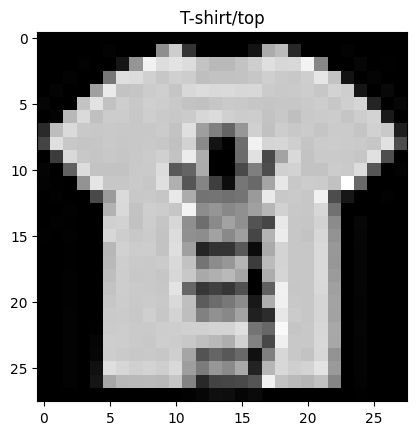

In [11]:
label = temp.iloc[:, 0]
#testing
img = temp.drop('label', axis=1).values[13].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(label[13])

In [12]:
#training
df_train = df_train.dropna() #doesnt have any NA anyway

In [13]:
#X colums
X = df_train[df_train.columns[1:]]
#pred
y = df_train["label"]

In [17]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [15]:
#same for test
testX = df_test[df_test.columns[1:]]
testY = df_test["label"]

In [16]:
#data scaling
X = X.astype("float32")/255

In [19]:
#y needs to be converted into categorical
y = pd.Categorical(y)
type(y)

pandas.core.arrays.categorical.Categorical

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
#logistic regression
lr = LogisticRegression(solver = 'lbfgs', max_iter = 100)

In [23]:
y

[2, 9, 6, 0, 3, ..., 9, 1, 8, 8, 7]
Length: 60000
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [24]:
lr.fit(X, y)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
import joblib

In [26]:
joblib.dump(lr, 'lr_fashionMNIST.pkl')

['lr_fashionMNIST.pkl']